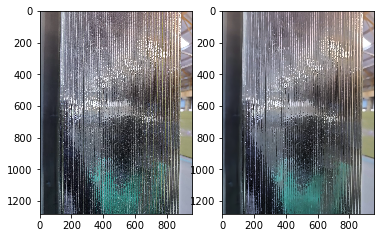

In [148]:
# importing libraries
import numpy as np
import cv2 
from matplotlib import pyplot as plt
img = cv.imread('task.jpg')     # reading the image
dst = cv.fastNlMeansDenoisingColored(img,None,10,10,7,21)   # denoising the image
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()

In [149]:
img.shape


(1280, 960, 3)

In [150]:
med = np.median(dst)
med

112.0

In [151]:
low = int(max(0, 0.7*med))
up = int(min(255,1.3*med))

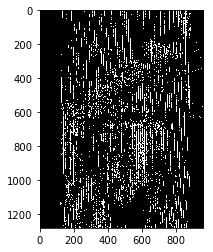

In [152]:
edges = cv2.Canny(dst,low+90,up)
plt.imshow(edges,cmap='gray')

In [153]:
edges.shape

(1280, 960)

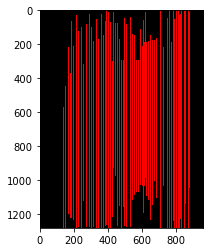

In [154]:
rho = 1
theta = 3*np.pi/180
threshold = 250
min_line_length = 20
max_line_gap = 960

# Run Hough on the edge-detected image 
lines = cv2.HoughLinesP(edges, rho,theta, threshold, np.array([]), min_line_length, max_line_gap)
blank_image2 = np.zeros(shape = [1280,960,3], dtype = np.uint8)      # creating a blank_image to draw lines on 

# Iterate over the output "lines" and draw lines on the blank_image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(blank_image2, (x1,y1), (x2,y2), [255,0,0], 2)
        
plt.imshow(blank_image2, cmap = 'gray')  

In [155]:
len(lines)

203

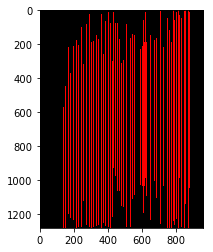

In [156]:
rho = 1
theta = 3*np.pi/180
threshold = 250
min_line_length = 20
max_line_gap = 960

# Run Hough on the edge-detected image 
lines = cv2.HoughLinesP(edges, rho,theta, threshold, np.array([]), min_line_length, max_line_gap)
blank_image2 = np.zeros(shape = [1280,960,3], dtype = np.uint8)     # creating a blank_image to draw lines on 
lines = lines.reshape((-1,4))
lines = lines[lines[:,0].argsort()]             # sorting the lines array
perfectLines = []
prevx1 = 0

# Iterate over the output "lines" and draw lines on the blank_image
for x1,y1,x2,y2 in lines:
    if x1 > (prevx1+2):          # assuming the thickness of sheet is 2 units
        cv2.line(blank_image2, (x1,y1), (x2,y2), [255,0,0], 2)
        prevx1 = x1
        perfectLines.append(x1)
plt.imshow(blank_image2, cmap = 'gray')  

In [157]:
print('Number of lines which are two units apart are',len(perfectLines))

Number of lines which are two units apart are 113
